## Champagne Coding - February 26, 2020

### Predict Housing Prices
In this notebook, we will create a model to predict house prices.

Start by importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from pathlib import Path

%matplotlib inline

In [2]:
root_dir = Path.cwd()
data_dir = Path(root_dir, 'data')
model_dir = Path(root_dir, 'models')

### Data
Load in the data set. Here we are using data about homes sold in Washington (USA). Once the data is loaded, let's explore what is in the data set.

In [3]:
data = pd.read_csv(Path(data_dir, "data.csv"))

### Part 1: Data Exploration

Use ```.keys()``` to find out what headers we have in the file. 

In [4]:
data.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

With ```.shape```, we can check the dimensionality of the dataframe as a tuple: ```(number of rows, number of columns)```

In [5]:
data.shape

(20613, 22)

Use ```.head()``` to view the first few rows of the dataframe. 

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


With ```.describe()```, we can generate descriptive statistics of the file.

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.061300e+04,2.061300e+04,20613.000000,20613.000000,20613.000000,2.061300e+04,20613.000000,20613.000000,20613.000000,20613.000000,...,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000,20613.000000
mean,4.573036e+09,5.402472e+05,3.367098,2.112757,2077.532091,1.503503e+04,1.493378,0.007568,0.234415,3.411003,...,1785.473439,292.058652,1970.905351,85.208073,98078.121525,47.560320,-122.214126,1983.709213,12730.650851,2014.322175
std,2.878128e+09,3.679310e+05,0.930622,0.771059,919.241740,4.095811e+04,0.540264,0.086667,0.767363,0.651469,...,828.215808,442.492391,29.390119,403.515493,53.557559,0.138268,0.140653,684.031176,26685.195653,0.467321
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471600,-122.328000,1480.000000,5100.000000,2014.000000
50%,3.904902e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.071100e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677900,-122.125000,2360.000000,10094.000000,2015.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,2015.000000


Now that we know a little bit about our data, let's use visualization to explore further.

We will start by using the ```value_counts``` function to get a pandas Series with the counts of unique values. We will plot this using a bar chart.

Text(0, 0.5, 'Count')

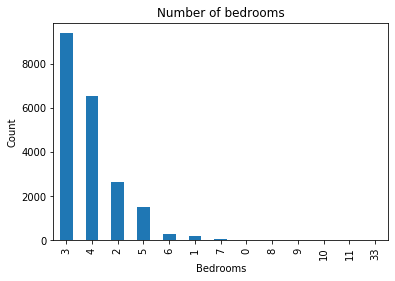

In [8]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Here, we will use a ```jointplot``` from Seaborn (imported as ```sns```) to plot the distribution of the latitude and longitude value, as well as the scatter plot.

<Figure size 720x720 with 0 Axes>

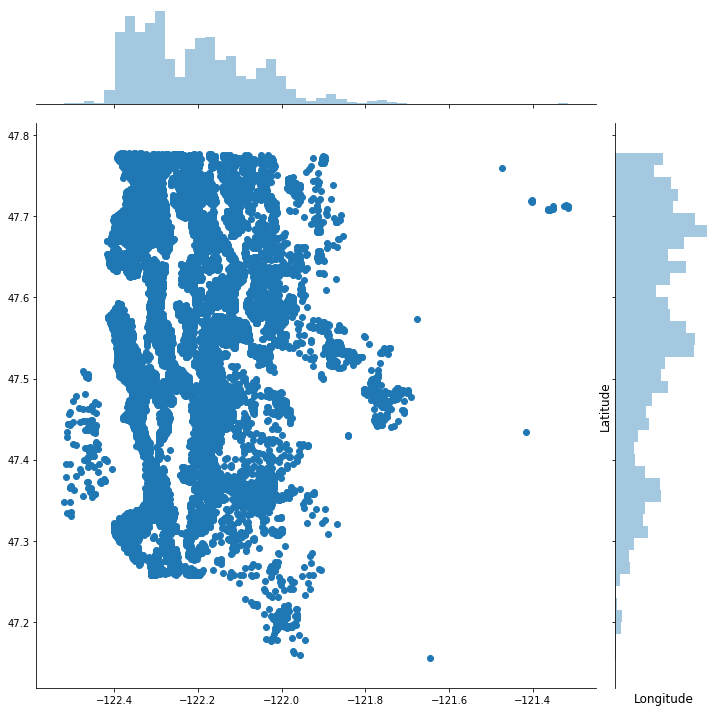

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.long.values, 
              y=data.lat.values, 
              height=10)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()

#### EXERCISE : For fun, you could find a Python geo library to overlay the locations of the houses on a map.

#### Pairwise relationships and correlations

Let's use a scatterplot matrix to visualize the pair-wise relationships and correlations between the different features.

This will also allow us to have a quick overview of how the data is distributed and whether it contains outliers or not.

In [13]:
import plotly.express as px
fig = px.scatter_matrix(data[['year', 'price', 'bedrooms', 'bathrooms', 
                              'sqft_living', 'floors', 'waterfront', 'view']], 
                        width=1000, 
                        height=1000)
fig.show()

ModuleNotFoundError: No module named 'plotly'

### Part 2: Start modeling

We will compare a couple different models:
- Linear Regression
- Gradient Boosting for Regression

First, let's split our data into an X, or __input__, and y, or __target variable__.

In [25]:
input_X_columns = [c for c in data.keys() if c not in ['id', 'price', 'date', 'view']]

X = data[input_X_columns]
y = data['price']

Now, let's split into a train and test set. We will use 90% of the data to train the model, and keep 10% (noted as ```test_size = 0.10```) for the test set to evaluate the model.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

We create a simple function to:
- Fit/train the model
- Save the predictions on the test data set
- Calculate the absolute errors
- Calcualte the score of the model 
- Save the model to a joblib file for accessing later

In [22]:
from joblib import dump, load

def train_model_evaluate(m, m_name, train_features, train_labels, test_features, test_labels):
    # Train the model on training data
    m.fit(train_features, train_labels);

    # Use the predict method on the test data
    predictions = m.predict(test_features)

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    
    # Score
    score = m.score(test_features, test_labels)
    
    # Save the model
    dump(m, Path(model_dir, '{}.joblib'.format(m_name)))
    
    # Print out the mean absolute error (mae)
    return round(np.mean(errors), 2), predictions, score

We will test two models - Linear Regression and Gradient Boosting for Regression.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble

# Instantiate models
linreg = LinearRegression()
grad_boost = ensemble.GradientBoostingRegressor(n_estimators = 400, 
                                                max_depth = 5, 
                                                min_samples_split = 2,
                                                learning_rate = 0.1, 
                                                loss = 'ls')

all_models = {'linear_regression': linreg, 
              'grad_boosting_regressor': grad_boost}


all_predictions = {}
results_dict = {}
    
for model_name, m in all_models.items():
    results_dict[model_name]= {}
    mae, pred, score = train_model_evaluate(m, model_name, X_train, y_train, X_test, y_test)

    results_dict[model_name]['mae'] = mae
    results_dict[model_name]['score'] = score
    all_predictions[model_name] = pred

In [24]:
all_results = pd.DataFrame(results_dict)
all_results

,linear_regression,grad_boosting_regressor
mae,123495.260000,64444.730000
score,0.695364,0.897465


#### EXERCISE : Try to improve the model results. 

Suggestions: new models, adjust the train/test split, pre-processing?

### Part 3: Load and predict

Load in the validation data set and one of the models we made above. Here, we can make a test that the model has to be better than a certain number to go to production.

In [16]:
validate = pd.read_csv(Path(data_dir, "validate.csv"))
validate_X = validate[input_X_columns]
validate_y = validate['price']

In [17]:
def predict(model_loaded, validate_X, validate_y):
    
    # Use the predict method on the test data
    predictions = model_loaded.predict(validate_X)
    
    # Calculate the absolute errors
    errors = abs(predictions - validate_y)
    
    # Score
    score = model_loaded.score(validate_X, validate_y)
    
    return predictions, score

In [18]:
clf_loaded = load(Path(model_dir, 'grad_boosting_regressor.joblib'))

predictions, score = predict(clf_loaded, validate_X, validate_y)

What is the score?

In [19]:
print(score)

0.8859167628718416
